In [8]:
!pip install procgen > /dev/null 2>&1

In [9]:
import torch
from procgen import ProcgenEnv
from agent import Agent
from procgen_wrappers import VecExtractDictObs, TransposeFrame, ScaledFloatFrame

agent = Agent().cuda()
agent.load_state_dict(torch.load('agent_weights.pth'))

env = ProcgenEnv(
        num_envs=1,
        env_name="fruitbot",
        start_level=0,
        num_levels=100,
        distribution_mode='easy',
    )

env = VecExtractDictObs(env, "rgb")
env = TransposeFrame(env)
env = ScaledFloatFrame(env)

(-0.5, 63.5, 63.5, -0.5)

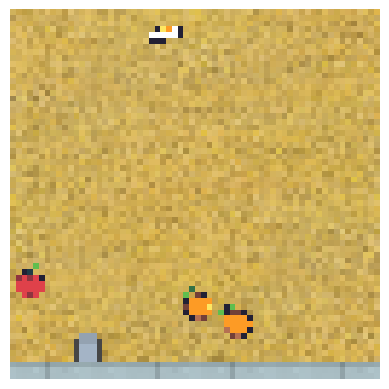

In [13]:
import matplotlib.pyplot as plt

obs = env.reset()
plt.imshow(obs[0].transpose(1,2,0))
plt.axis('off')

In [14]:
import imageio
from IPython.display import Image
from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

def obs_to_image(obs):
  return (obs[0].transpose(1,2,0) * 255).astype(np.uint8)

def display_trajectory(frames, fps=25):
  imageio.mimwrite('./tmp.gif',
                [obs_to_image(frame) for i, frame in enumerate(frames)],
                fps=fps)
  return(Image(open('tmp.gif','rb').read(), width=500, height=500))

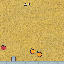

In [15]:
frames = []
obs = env.reset()

while True:
    frames.append(obs)
    obs = torch.FloatTensor(obs).to('cuda')
    action = agent(obs).argmax(1).cpu().numpy()
    obs, _, done ,_ = env.step(action)
    img = env.render()
    if done[0]:
        break

env.close()

display_trajectory(frames)